In [1]:
# loading data via pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
#loading data from the url and converting into dataframe 
df=pd.read_csv('bank.csv')

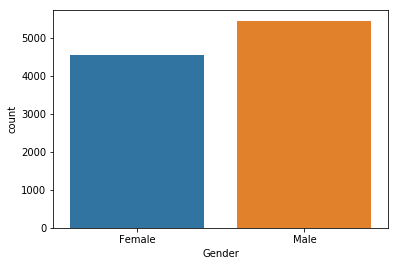

In [3]:
sb.countplot(df['Gender'])

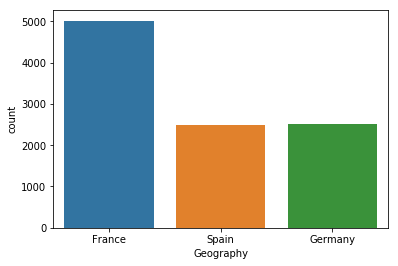

In [4]:
sb.countplot(df['Geography'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb76072518>,
      dtype=object)

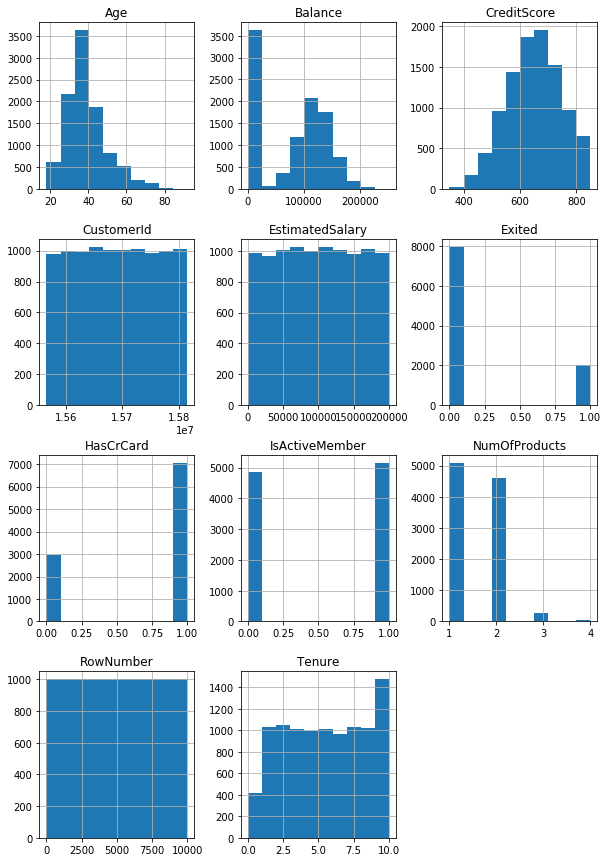

In [5]:
# histogram
df.hist(figsize=(10,15))

In [6]:
# features and label of data
features=df.iloc[:,3:13].values

In [7]:
features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
# bank exit status that is label 
label=df.iloc[:,13].values

In [9]:
label

array([1, 0, 1, ..., 1, 1, 0])

In [10]:
# to convert string data into numeric we can apply label encoding 
from sklearn.preprocessing import LabelEncoder
countenc=LabelEncoder()

In [11]:
countenc=LabelEncoder() # function call

In [12]:
features[0:,1]=countenc.fit_transform(features[0:,1]) # fit country and transformed into a number 

In [13]:
features

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [14]:
# same for gender 
features[0:,2]=countenc.fit_transform(features[0:,2])

In [15]:
features

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
# creating dummy variables using OneHot encoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
#calling function 
counthot=OneHotEncoder(categorical_features=[1])

In [18]:
# apply
features=counthot.fit_transform(features).toarray()
features1=features[:,1:]

/home/aryan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/aryan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
# checking columns 
features1.shape

(10000, 11)

In [20]:
# training and testing
from sklearn.model_selection import train_test_split

In [21]:
X,x,Y,y=train_test_split(features1,label,test_size=0.2)

In [22]:
#features scaling 
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
 # training data scale 
X=sc.fit_transform(X)

In [25]:
# testing data transform 
x=sc.transform(x)

In [26]:
#X
X.shape

(8000, 11)

Now we can create ANN model

In [27]:
import keras # this is the way of using tensorflow in background

Using TensorFlow backend.
W0708 16:54:04.509689 140581406828352 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [33]:
# keras ANN model library import
from keras.models import Sequential
# this will offer external model ANN

In [35]:
#filling data in each layer
from keras.layers import Dense
# this will give the method to decide activation fxn and number of nodes in each layer
# including input ,hidden and output layer

In [36]:
# now we can design Model
model=Sequential()

W0708 16:54:45.915302 140581406828352 deprecation_wrapper.py:119] From /home/aryan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [37]:
#now we cam add input layer
model.add(Dense(6,input_shape=(11,),activation="relu"))
# relu means rectifier activation fxn 

W0708 16:54:47.158417 140581406828352 deprecation_wrapper.py:119] From /home/aryan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 16:54:47.476888 140581406828352 deprecation_wrapper.py:119] From /home/aryan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [38]:
# adding one more hidden layer
model.add(Dense(1,activation='sigmoid'))

In [40]:
# compile 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#   optimizer -- weight adjust method -- stochastic g d adam

W0708 16:55:00.077846 140581406828352 deprecation_wrapper.py:119] From /home/aryan/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 16:55:00.160143 140581406828352 deprecation_wrapper.py:119] From /home/aryan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0708 16:55:00.173907 140581406828352 deprecation.py:323] From /home/aryan/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
#training data fit
model.fit(X,Y,batch_size=2000,epochs=100)

W0708 16:55:01.659515 140581406828352 deprecation_wrapper.py:119] From /home/aryan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
8000/8000 [==============================] - 3s 426us/step - loss: 0.9077 - acc: 0.3001
Epoch 2/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.8962 - acc: 0.3061
Epoch 3/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.8840 - acc: 0.3143
Epoch 4/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.8721 - acc: 0.3211
Epoch 5/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.8603 - acc: 0.3309
Epoch 6/100
8000/8000 [==============================] - 0s 9us/step - loss: 0.8487 - acc: 0.3374
Epoch 7/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.8375 - acc: 0.3480
Epoch 8/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.8266 - acc: 0.3601
Epoch 9/100
8000/8000 [==============================] - 0s 10us/step - loss: 0.8160 - acc: 0.3729
Epoch 10/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.8057 - acc: 0.3864
Epoch 11/100
80

8000/8000 [==============================] - 0s 9us/step - loss: 0.4946 - acc: 0.8029
Epoch 84/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4930 - acc: 0.8032
Epoch 85/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.4915 - acc: 0.8038
Epoch 86/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.4900 - acc: 0.8044
Epoch 87/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.4885 - acc: 0.8049
Epoch 88/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.4870 - acc: 0.8056
Epoch 89/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4856 - acc: 0.8062
Epoch 90/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.4842 - acc: 0.8069
Epoch 91/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.4829 - acc: 0.8071
Epoch 92/100
8000/8000 [==============================] - 0s 5us/step - loss: 0.4816 - acc: 0.8069
Epoch 93/100
8000/8000 

In [42]:
model.predict(x) # now prediction text data

array([[0.09931439],
       [0.4892175 ],
       [0.5108988 ],
       ...,
       [0.2104331 ],
       [0.14940456],
       [0.22304219]], dtype=float32)